# Data Preprocessing on Flights Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(f"C:/Users/Lenovo/DWDM/flights.csv")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7720\3876679359.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"C:/Users/Lenovo/DWDM/flights.csv")


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
flight_data = pd.read_csv(f"C:/Users/Lenovo/DWDM/flights.csv",  dtype = {'ORIGIN_AIRPORT':str,'DESTINATION_AIRPORT':str})

In [5]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [6]:
flight_data.describe(include="object")

,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,CANCELLATION_REASON
count,5819079,5804358,5819079,5819079,89884
unique,14,4897,628,629,4
top,WN,N480HA,ATL,ATL,B
freq,1261855,3768,346836,346904,48851


In [7]:
flight_data.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [8]:
wheels_off = flight_data['WHEELS_OFF'].describe()
wheels_off

count    5.730032e+06
mean     1.357171e+03
std      4.980094e+02
min      1.000000e+00
25%      9.350000e+02
50%      1.343000e+03
75%      1.754000e+03
max      2.400000e+03
Name: WHEELS_OFF, dtype: float64

In [9]:
wheels_on = flight_data['WHEELS_ON'].describe()
wheels_on

count    5.726566e+06
mean     1.471469e+03
std      5.221879e+02
min      1.000000e+00
25%      1.054000e+03
50%      1.509000e+03
75%      1.911000e+03
max      2.400000e+03
Name: WHEELS_ON, dtype: float64

In [10]:
wheels_off = wheels_off.apply(lambda x: '{:.2f}'.format(x))
wheels_off

count    5730032.00
mean        1357.17
std          498.01
min            1.00
25%          935.00
50%         1343.00
75%         1754.00
max         2400.00
Name: WHEELS_OFF, dtype: object

In [11]:
wheels_on = wheels_on.apply(lambda x: '{:.2f}'.format(x))
wheels_on

count    5726566.00
mean        1471.47
std          522.19
min            1.00
25%         1054.00
50%         1509.00
75%         1911.00
max         2400.00
Name: WHEELS_ON, dtype: object

In [12]:
flight_data.fillna({'WHEELS_OFF': 1500}, inplace = True)
flight_data['WHEELS_OFF'].isna().sum()

0

In [13]:
taxi_in = flight_data['TAXI_IN'].describe()
taxi_in

count    5.726566e+06
mean     7.434971e+00
std      5.638548e+00
min      1.000000e+00
25%      4.000000e+00
50%      6.000000e+00
75%      9.000000e+00
max      2.480000e+02
Name: TAXI_IN, dtype: float64

In [14]:
taxi_out = flight_data['TAXI_OUT'].describe()
taxi_out

count    5.730032e+06
mean     1.607166e+01
std      8.895574e+00
min      1.000000e+00
25%      1.100000e+01
50%      1.400000e+01
75%      1.900000e+01
max      2.250000e+02
Name: TAXI_OUT, dtype: float64

In [15]:
taxi_in = taxi_in.apply(lambda x: '{:.2f}'.format(x))
taxi_in

count    5726566.00
mean           7.43
std            5.64
min            1.00
25%            4.00
50%            6.00
75%            9.00
max          248.00
Name: TAXI_IN, dtype: object

In [16]:
taxi_out = taxi_out.apply(lambda x: '{:.2f}'.format(x))
taxi_out

count    5730032.00
mean          16.07
std            8.90
min            1.00
25%           11.00
50%           14.00
75%           19.00
max          225.00
Name: TAXI_OUT, dtype: object

In [17]:
flight_data.fillna({'TAXI_IN': 6}, inplace = True)
flight_data.fillna({'TAXI_OUT': 14}, inplace = True)

In [18]:
flight_data.fillna({'WHEELS_ON': 1490}, inplace = True)
flight_data['WHEELS_ON'].isna().sum()

0

In [19]:
arrival_delay =  flight_data['ARRIVAL_DELAY'].describe()

In [20]:
arrival_delay = arrival_delay.apply(lambda x: '{:.2f}'.format(x))
arrival_delay

count    5714008.00
mean           4.41
std           39.27
min          -87.00
25%          -13.00
50%           -5.00
75%            8.00
max         1971.00
Name: ARRIVAL_DELAY, dtype: object

In [21]:
flight_data['ARRIVAL_DELAY'].fillna(flight_data['ARRIVAL_DELAY'].mean(), inplace=True)
flight_data['ARRIVAL_DELAY'].isna().sum()

0

In [22]:
flight_data['TAIL_NUMBER'].value_counts()

TAIL_NUMBER
N480HA    3768
N488HA    3723
N484HA    3723
N493HA    3585
N478HA    3577
          ... 
N175UA       1
N852NW       1
N7LBAA       1
N7LEAA       1
N180UA       1
Name: count, Length: 4897, dtype: int64

In [23]:
flight_data.fillna({'TAIL_NUMBER': 'UNKNOWN'}, inplace = True)
flight_data['TAIL_NUMBER'].isna().sum()

0

In [24]:
flight_data['CANCELLATION_REASON'].value_counts()

CANCELLATION_REASON
B    48851
A    25262
C    15749
D       22
Name: count, dtype: int64

In [25]:
flight_data['CANCELLATION_REASON'].mode()

0    B
Name: CANCELLATION_REASON, dtype: object

In [26]:
flight_data['CANCELLATION_REASON'].fillna(flight_data['CANCELLATION_REASON'].mode()[0], inplace=True)

In [27]:
flight_data.fillna({'ARRIVAL_TIME': flight_data['ARRIVAL_TIME'].mean()}, inplace = True)
flight_data.fillna({'DEPARTURE_DELAY': flight_data['DEPARTURE_DELAY'].mean()}, inplace = True)
flight_data.fillna({'DEPARTURE_TIME': flight_data['ARRIVAL_TIME'].mean()}, inplace = True)
flight_data.fillna({'ELAPSED_TIME': flight_data['ELAPSED_TIME'].mean()}, inplace = True)
flight_data.fillna({'AIR_TIME': flight_data['AIR_TIME'].mean()}, inplace = True)
flight_data.fillna({'SCHEDULED_TIME': flight_data['SCHEDULED_TIME'].mean()}, inplace = True)

### Encoding

In [28]:
h

In [29]:
le = LabelEncoder()

In [30]:
flight_data['CANCELLATION_REASON'].unique()

array(['B', 'A', 'C', 'D'], dtype=object)

In [31]:
flight_data['CANCELLATION_REASON_ENC']=le.fit_transform(flight_data['CANCELLATION_REASON'])

In [32]:
flight_data[['CANCELLATION_REASON','CANCELLATION_REASON_ENC']]

,CANCELLATION_REASON,CANCELLATION_REASON_ENC
0,B,1
1,B,1
2,B,1
3,B,1
4,B,1
...,...,...
5819074,B,1
5819075,B,1
5819076,B,1
5819077,B,1


In [33]:
mapping_dict = dict(zip(range(len(le.classes_)), le.classes_))
mapping_dict

{0: 'A', 1: 'B', 2: 'C', 3: 'D'}

In [34]:
flight_data.drop('CANCELLATION_REASON_ENC', axis=1, inplace=True)

In [35]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
ohe = OneHotEncoder()

In [37]:
feature_to_encode = flight_data['CANCELLATION_REASON'].values.reshape(-1, 1)
encoded_feature = ohe.fit_transform(feature_to_encode).toarray()
feature_names = ohe.get_feature_names_out(['CANCELLATION_REASON'])
encoded_df = pd.DataFrame(encoded_feature, columns=feature_names)
flight_data_enc = pd.concat([flight_data, encoded_df], axis=1)

In [38]:
flight_data_enc[['CANCELLATION_REASON_A',
       'CANCELLATION_REASON_B', 'CANCELLATION_REASON_C',
       'CANCELLATION_REASON_D', 'CANCELLATION_REASON']]

,CANCELLATION_REASON_A,CANCELLATION_REASON_B,CANCELLATION_REASON_C,CANCELLATION_REASON_D,CANCELLATION_REASON
0,0.0,1.0,0.0,0.0,B
1,0.0,1.0,0.0,0.0,B
2,0.0,1.0,0.0,0.0,B
3,0.0,1.0,0.0,0.0,B
4,0.0,1.0,0.0,0.0,B
...,...,...,...,...,...
5819074,0.0,1.0,0.0,0.0,B
5819075,0.0,1.0,0.0,0.0,B
5819076,0.0,1.0,0.0,0.0,B
5819077,0.0,1.0,0.0,0.0,B


In [39]:
flight_data['ARRIVAL_TIME'].mean()

1476.4911879126169

In [40]:
flight_data['SECURITY_DELAY'].nunique()

154

In [41]:
flight_data.fillna({'AIR_SYSTEM_DELAY': 0, 'SECURITY_DELAY': 0, 'AIRLINE_DELAY': 0, 'LATE_AIRCRAFT_DELAY': 0, 'WEATHER_DELAY': 0}, inplace=True)

In [42]:
flight_data.isna().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
CANCELLATION_REASON    0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64

## EDA and basic charts

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

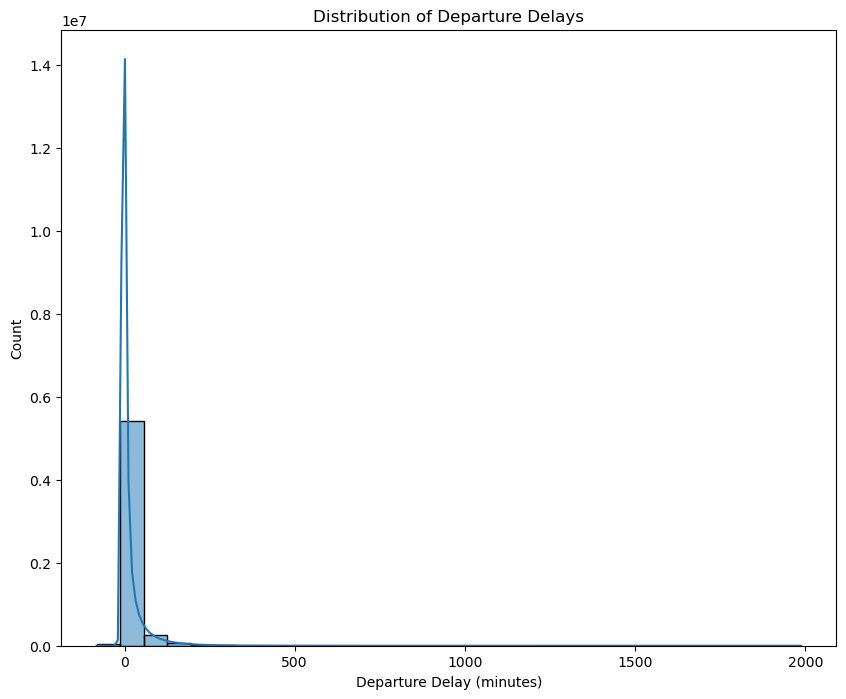

In [44]:
plt.figure(figsize=(10, 8))
sns.histplot(flight_data, x='DEPARTURE_DELAY', bins=30, kde=True)
plt.title('Distribution of Departure Delays')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Count')
plt.show()

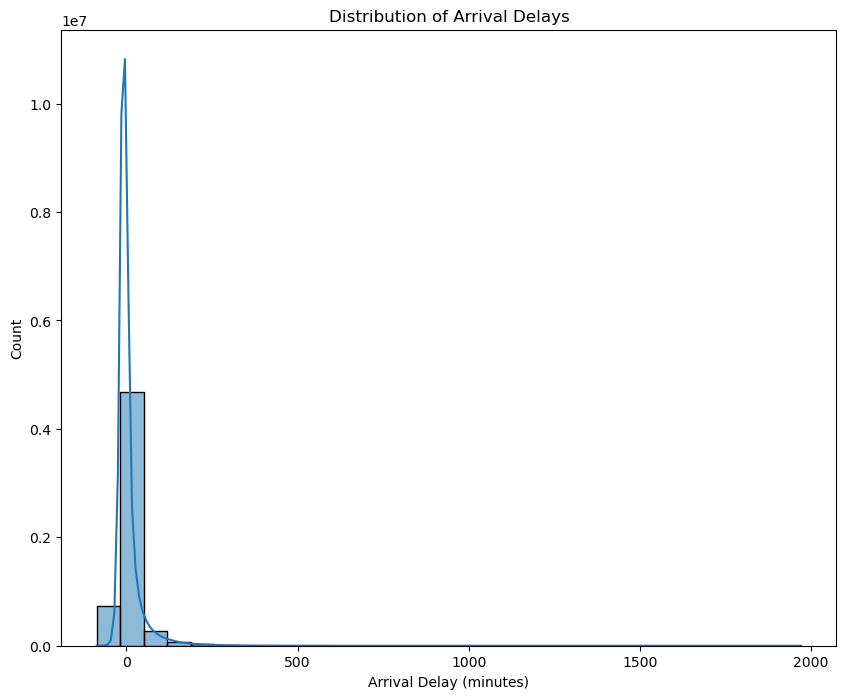

In [45]:
plt.figure(figsize=(10, 8))
sns.histplot(data=flight_data, x='ARRIVAL_DELAY', bins=30, kde=True)
plt.title('Distribution of Arrival Delays')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Chart to show the reason for delays')

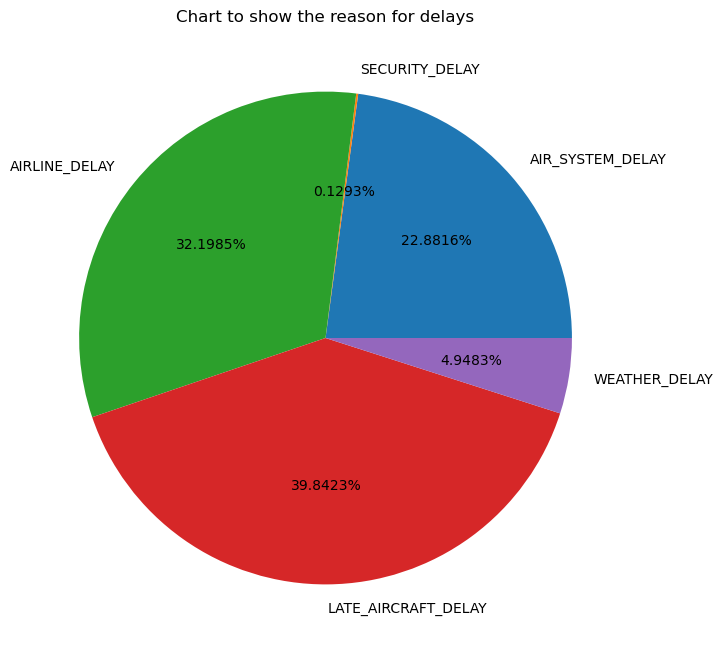

In [46]:
delay_reasons = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
delay_counts = flight_data[delay_reasons].sum().values

plt.figure(figsize=(10, 8))
plt.pie(delay_counts, labels=delay_reasons, autopct='%1.4f%%')
plt.title('Chart to show the reason for delays')

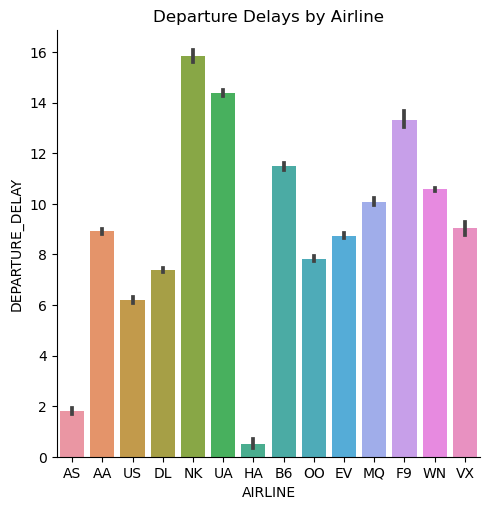

In [47]:
sns.catplot(data=flight_data, x='AIRLINE', y='DEPARTURE_DELAY', kind='bar')
plt.title('Departure Delays by Airline')
plt.show()

# Conclusion:
### In this lab, we conducted data preprocessing by handling null values as well as encoding the required data types. We also performed some basic charts and EDA using matplotlib and seaborn